## 정규 방정식
- 정규 방정식 공식을 테스트하기 위한 선형 데이터 작성

In [2]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

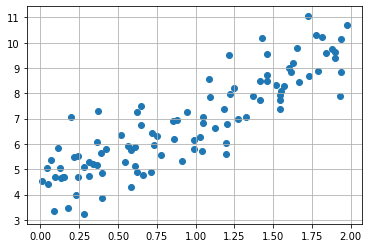

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.grid()
plt.show()

In [4]:
#정규 방정식을 사용해 가장 좋은 theta 값 계산하기
from sklearn.preprocessing import add_dummy_feature

X_b=add_dummy_feature(X)
#@ 연산자는 행렬 곱셈을 수행(np.matmul(A,B)와 동일한 연산)
theta_best=np.linalg.inv(X_b.T @ X_b) @X_b.T @y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
#위에서 구한 가장 좋은 theta 값을 이용해 예측 생성
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b@theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

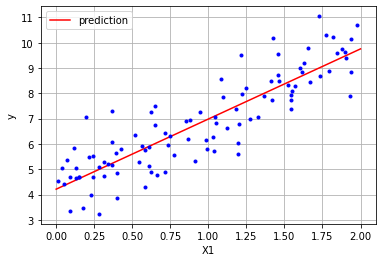

In [7]:
#모델의 예측 그래프 그리기
plt.plot(X_new, y_predict, "r-", label="prediction")
plt.plot(X,y,"b.")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

In [8]:
#사이킷런에서 선형 회귀를 수행
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [9]:
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
#LinearRegression 클래스가 기반으로 하는 scipy.linalg.lstsq() 함수 직접 호출
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
#유사역행렬 직접 구해보기
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

## 배치 경사 하강법

In [13]:
#내려가는 스텝의 크기를 결정하는 방법

eta=0.1 #학습률
n_epochs=1000
m=len(X_b) #샘플 수 

np.random.seed(42)
theta=np.random.randn(2,1) #모델 파리미터 랜덤 초기화

#훈련 세트를 한 번 반복하는 것을 epoch라고 함
for epoch in range(n_epochs):
    gradients=2/m*X_b.T@(X_b@theta-y)
    theta=theta-eta*gradients

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

## 확률적 경사 하강법

In [15]:
#학습 스케줄을 사용한 확률적 경사 하강법
import numpy as np

n_epochs=50
t0,t1=5,50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T@(xi@theta-yi)
        eta=learning_schedule(epoch*m+iteration)
        theta=theta-eta*gradients

In [16]:
theta

array([[4.21076011],
       [2.74856079]])

In [17]:
#최대 1000번 에포크동안 실행하는 동안 100번 에포크 동안 손실이 10^-5보다 작아질 때까지 실행
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                    n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [18]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## 다항 회귀

In [19]:
#2차 방정식에 잡음을 추가한 비선형 데이터 생성
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [20]:
#사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
#각 특성을 제곱하여 새로운 특성으로 추가
X_poly=poly_features.fit_transform(X)

In [21]:
X[0]

array([-0.75275929])

In [22]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [23]:
#선형회귀 적용
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

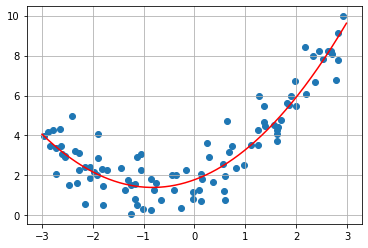

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
x=np.arange(-3,3,0.01)
plt.plot(x,lin_reg.intercept_[0]+lin_reg.coef_[0][0]*x+lin_reg.coef_[0][1]*x**2,'r')
plt.grid(True)

## 학습 곡선

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores=learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error")

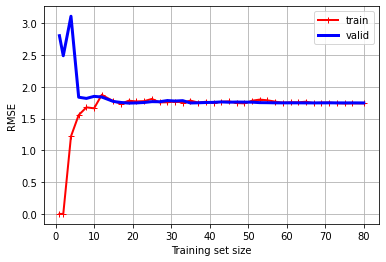

In [26]:
train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(True)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.show()

In [27]:
#위와 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 생성
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

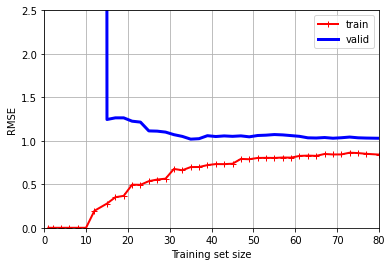

In [28]:
train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0,80,0,2.5])
plt.show()

## 릿지 회귀

In [29]:
#매우 작고 잡음이 많은 선형 데이터셋 생성
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

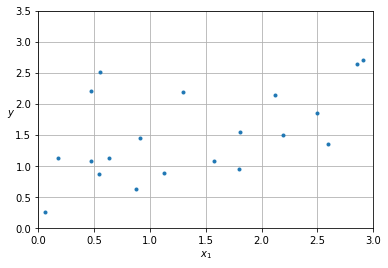

In [30]:
#생성한 데이터셋 간단히 그려보기
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$ ",rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [31]:
#정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [32]:
#확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg=SGDRegressor(penalty="l2", alpha=0.1/m,tol=None,
                    max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## 라쏘 회귀

In [33]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1) #대신 SGDRegressor(penalty="l1", alpha=0.1) 사용 가능
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 엘라스틱넷 회귀

In [34]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5) #l1_ratio는 혼합비율 r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기종료

In [35]:
#실제로 학습을 주지하지는 않지만 학습 후 최상의 모델로 되돌리는 코드
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.1, random_state=42)

In [36]:
preprocessing=make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                           StandardScaler()) #규제가 없고 학습률이 작음
X_train_prep=preprocessing.fit_transform(X_train)
X_valid_prep=preprocessing.transform(X_valid)
sgd_reg=SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs=500
best_valid_rmse=float('inf')

In [37]:
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel()) #점진적 학습
    y_valid_predict=sgd_reg.predict(X_valid_prep)
    val_error=root_mean_squared_error(y_valid, y_valid_predict)
    if val_error<best_valid_rmse: #오차가 최저점에 도달할 때마다 최고의 모델을 저장
        best_valid_rmse=val_error
        best_model=deepcopy(sgd_reg) #모델 전체를 복사 

# 로지스틱 회귀
## 결정 경계

In [38]:
#꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [39]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [40]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
#데이터를 분할하고 훈련 세트에서 로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=iris.data[["petal width (cm)"]].values
y=iris.target_names[iris.target]=='virginica'
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

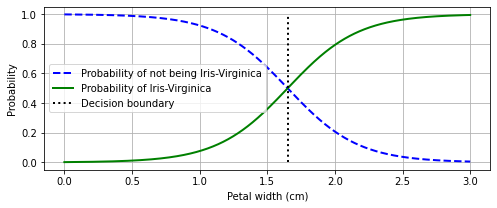

In [44]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new=np.linspace(0,3,1000).reshape(-1,1) #column vector
y_proba=log_reg.predict_proba(X_new)
decision_boundary=X_new[y_proba[:,1]>=0.5][0,0]

plt.figure(figsize=(8,3))
plt.plot(X_new, y_proba[:,0],"b--",linewidth=2,
         label="Probability of not being Iris-Virginica")
plt.plot(X_new, y_proba[:,1],"g-",linewidth=2,label="Probability of Iris-Virginica")
plt.plot([decision_boundary, decision_boundary],[0,1],"k:",linewidth=2,
        label="Decision boundary")
plt.grid()
plt.legend(loc="center left")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.show()